{% include toc title="In This Chapter" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-ship" aria-hidden="true"></i> Chapter Eight - NAIP Data In Python

In this chapter, you will learn how to work with NAIP multi-band raster data stored in `.tif` format in **Python** using **rasterio**.

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this chapter, you will be able to:

* Open an RGB image with 3-4 bands in **Python** using **rioxarray**.
<!--* Export an RGB image as a Geotiff using `writeRaster()`.-->
* Identify the number of bands stored in a multi-band raster in **Python**.
* Plot various band composites in **Python** including True Color (RGB), and Color Infrared (CIR) color images.

## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What You Need

You will need a computer with internet access to complete this chapter and the Cold Springs Fire data.

{% include/data_subsets/course_earth_analytics/_data-cold-springs-fire.md %}

</div>

## What is NAIP?

In this chapter, you will work with NAIP data.

>The National Agriculture Imagery Program (NAIP) acquires aerial imagery during the agricultural growing seasons in the continental U.S. A primary goal of the NAIP program is to make digital ortho photography available to governmental agencies and the public within a year of acquisition.

> NAIP is administered by the USDA's Farm Service Agency (FSA) through the Aerial Photography Field Office in Salt Lake City. This "leaf-on" imagery is used as a base layer for GIS programs in FSA's County Service Centers, and is used to maintain the Common Land Unit (CLU) boundaries. -- USDA NAIP Program

<a href="https://www.fsa.usda.gov/programs-and-services/aerial-photography/imagery-programs/naip-imagery/" target="_blank">Read more about NAIP</a>

NAIP is a great source of high resolution imagery across the United States.
NAIP imagery is often collected with just a red, green and Blue band. However,
some flights include a near infrared band which is very useful for quantifying
vegetation cover and health.

NAIP data access: The data used in this lesson were downloaded from the <a href="https://earthexplorer.usgs.gov/" target="_blank">USGS Earth explorer website. </a>

## Open NAIP Data in Python

Next, you will use NAIP imagery for the Coldsprings fire study area in
Colorado. To work with multi-band raster data you will use the `rioxarray` and `geopandas`
packages. You will also use the `plot` module from the `earthpy` package for raster plotting.

Before you get started, make sure that your working directory is set.

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es

# Get the data
data = et.data.get_data('cold-springs-fire')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.titlesize'] = 20

To begin, you will use the rioxarray open_rasterio function to open the multi-band NAIP image

`rxr.open_rasterio("path-to-tif-file-here")`

Don't forget that with rioxarray you can automatically mask out the fill values of a raster with the argument `masked=True` in `open_rasterio`. 

In [4]:
naip_csf_path = os.path.join("cold-springs-fire", 
                             "naip", 
                             "m_3910505_nw_13_1_20150919", 
                             "crop", 
                             "m_3910505_nw_13_1_20150919_crop.tif")

naip_csf = rxr.open_rasterio(naip_csf_path, masked=True)
naip_csf

<xarray.DataArray (band: 4, y: 2312, x: 4377)>
[40478496 values with dtype=float64]
Coordinates:
  * band         (band) int64 1 2 3 4
  * y            (y) float64 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
  * x            (x) float64 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    scale_factor:        1.0
    add_offset:          0.0
    grid_mapping:        spatial_ref

Above you imported a geotiff like you've done before. But this file is different. Notice the shape of the resulting numpy array. How many layers (known as bands) does it have?

In [5]:
naip_csf.shape

(4, 2312, 4377)

Just like you've done before, you can plot a single band in the NAIP raster using `imshow()`. However, now that you have multiple layers or bands, you need to tell `imshow()` what layer you wish to plot. Use `arrayname[0]` to plot the first band of the image.


In [12]:
# 
# astype("float64") <- coerce to int if you want to plot using xarray
# naip_csf.astype("uint8").plot()

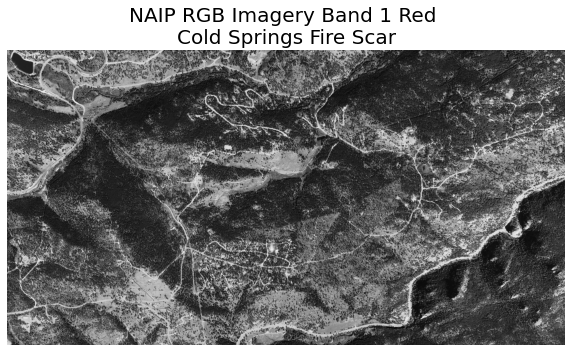

In [6]:
fig, ax = plt.subplots()

ax.imshow(naip_csf[0], 
          cmap="Greys_r")
ax.set_title("NAIP RGB Imagery Band 1 Red \nCold Springs Fire Scar")
ax.set_axis_off()
plt.show()

Or you can use the earthpy function `plot_bands()`. Note that in this lesson, you will first be shown how to use **earthpy** to plot multiband rasters. The **earthpy** package was developed to make it easier to work with spatial data in **Python**. 

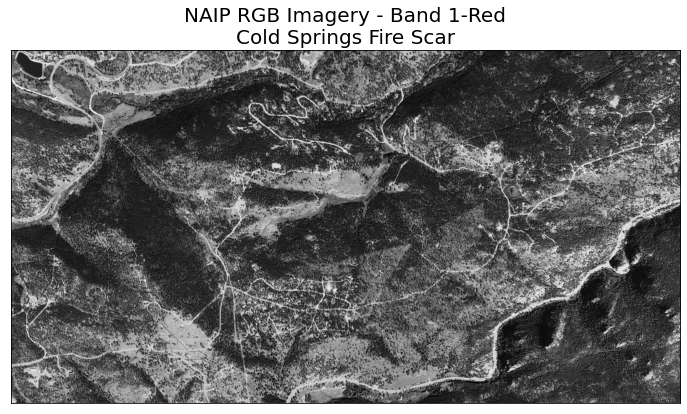

In [5]:
ep.plot_bands(naip_csf[0],
              title="NAIP RGB Imagery - Band 1-Red\nCold Springs Fire Scar",
              cbar=False)
plt.show()

Look closely at the `.band` element of your raster. Note that now, there are four bands instead of one. This is because you have multiple bands in your raster, one for each 'color' or type of light collected by the camera. For NAIP data you have red, green, blue and near infrared bands. When you worked with the lidar rasters in week 2 your count was 1 as a DSM or DTM is only composed of one band. 


In [6]:
naip_csf.band

<xarray.DataArray 'band' (band: 4)>
array([1, 2, 3, 4])
Coordinates:
  * band         (band) int64 1 2 3 4
    spatial_ref  int64 0


<i class="fa fa-star"></i> **Data Tip:** Remember that a tiff can store 1 or more bands. It's unusual to find tif files with more than 4 bands.
{: .notice--success}

### Image Raster Data Values
Next, examine the raster's min and max values. What is the value range?


In [7]:
# View min and max value
print(naip_csf.min())
print(naip_csf.max())

<xarray.DataArray ()>
array(17.)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(242.)
Coordinates:
    spatial_ref  int64 0


This raster contains values between 0 and 255. These values represent degrees of brightness associated with the image band. In the case of a RGB image (red, green and blue), band 1 is the red band. When we plot the red band, larger numbers (towards 255) represent pixels with more red in them (a strong red reflection). Smaller numbers (towards 0) represent pixels with less red in them (less red was reflected). 

To plot an RGB image, we mix red + green + blue values, using the ratio of each. The ratio of each color is determined by how much light was recorded (the reflectance value) in each band. This mixture creates one single color that, in turn, makes up the full color image - similar to the color image that your camera phone creates.

## 8 vs 16 Bit Images

It's important to note that this image is an 8 bit image. This means that all values in the raster are stored within a range of 0:255. This differs from a 16-bit image, in which values can be stored within a range of 0:65,535. 

In these lessons, you will work with 8-bit images. For 8-bit images, the brightest whites will be at or close to 255. The darkest values in each band will be closer to 0.

### Plot A Specific Band

You can plot a single band of your choice using numpy indexing. `naip_csf[1]` will access just the second band - which is the green band when using NAIP data. 

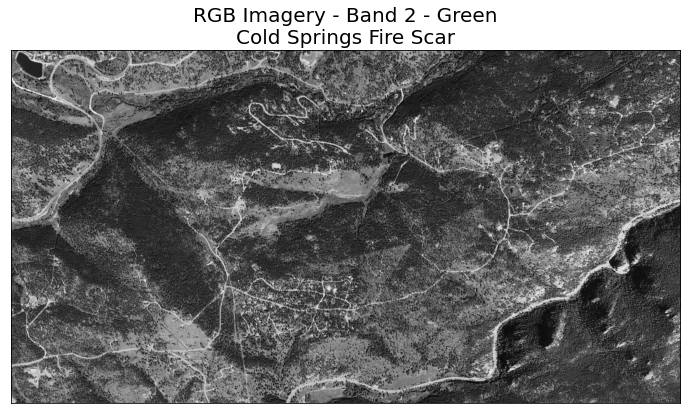

In [8]:
# Plot band 2 - green
ep.plot_bands(naip_csf[1],
              title="RGB Imagery - Band 2 - Green\nCold Springs Fire Scar",
              cbar=False)
plt.show()

## Rasters and Numpy Arrays - A Review 

Remember that when you import a raster dataset into Python, the data are converted to an **xarray** object. 
A numpy array has no inherent spatial information attached to it, nor does an **xarray** object. The data 
are just a matrix of values. This makes processing the data fast.

The spatial information for the raster is stored in a `.rio` attribute which is available if you import 
rioxarray in your workflow. This rio attribute allows you to export the data as a geotiff or other spatial format. 



### Plot Raster Band Images

Next plot each band in the raster. This is another intermediate step (like plotting histograms) that you might want to do when you first explore and open your data. You will not need this for your homework but you might want to do it to explore other data that you use in your career. Earthpy contains a plot_bands() function that allows you to quickly plot each band individually. 

Similar to plotting a single band, in each band "color", the brightest pixels are lighter in color or white representing a stronger reflectance for that color on that pixel. The darkest pixels are darker to black in color representing less reflectance of that color in that pixel. 

#### Plot Bands Using Earthpy

You can use the earthpy package to plot a single or all bands in your array. 
To use earthpy call:

`ep.plot_bands()`

plot_bands() takes several key agruments including:

* `arr`: an n-dimensional numpy array to plot.
* `figsize`: a tuple of 2 values representing the x and y dimensions of the image.
* `cols`: if you are plotting more than one band you can specify the number of columns in the grid that you'd like to plot. 
* `title`: OPTIONAL - A single title for one band or a list of x titles for x bands in your array.
* `cbar`: OPTIONAL - `ep.plot_bands()` by default will add a colorbar to each plot it creates. You can turn the colobar off by setting this argument to false. 

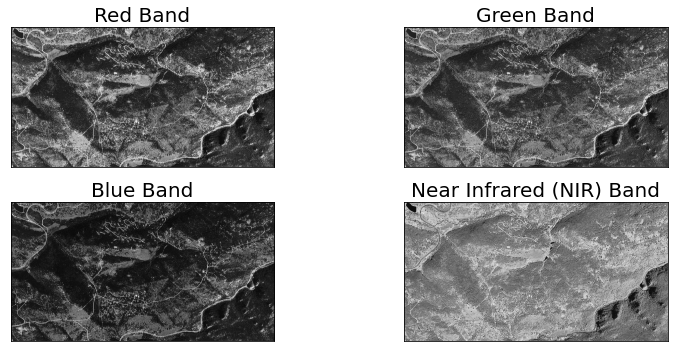

In [9]:
titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band"]

# Plot all bands using the earthpy function
ep.plot_bands(naip_csf, 
              figsize=(12, 5), 
              cols=2,
              title=titles,
              cbar=False)
plt.show()

<div class="notice--info" markdown="1">
## Optional - How The plot_bands Function is Built


```python

fig, axs = plt.subplots(2, 2, figsize=(20, 10))
for ax, i in zip(axs.ravel(), range(total_layers)):
    band = i + 1
    ax.imshow(es.bytescale(arr[i]), cmap='Greys')
    ax.set(title=title[i])
    ax.set(xticks=[], yticks=[])
plt.tight_layout()
```
</div>

## Plot RGB Data in Python


Previously you have plotted individual bands using a greyscale color ramp in Python. Next, you will learn how to plot an RGB composite image. This type of image is similar in appearance to one you capture using a cell phone or digital camera. 

<figure>
    <a href="{{ site.url }}/images/earth-analytics/raster-data/RGB-bands-raster-stack.jpg">
    <img src="{{ site.url }}/images/earth-analytics/raster-data/RGB-bands-raster-stack.jpg" alt="A true color image consists of 3 bands - red, green and blue.
    When composited or rendered together in a GIS, or even a image-editor like
    Photoshop the bands create a color image."></a>
    <figcaption>A "true" color image consists of 3 bands - red, green and blue.
    When composited or rendered together in a GIS, or even a image-editor like
    Photoshop the bands create a color image.
	Source: Colin Williams, NEON.
    </figcaption>
</figure>

You can use the Earthpy function called `plot_rgb()` to quickly plot 3 band composite images.
This function has several key arguments including

* `arr`: a numpy array in rasterio band order (bands first)
* `rgb`: the three bands that you wish to plot on the red, green and blue channels respectively
* `title`: OPTIONAL - if you want to add a title to your plot.

Similar to plotting with geopandas, you can provide an `ax=` argument as well to plot your data on a particular matplotlib axis.

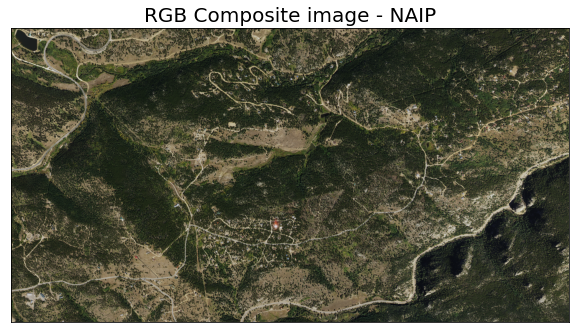

In [10]:
ep.plot_rgb(naip_csf.values,
            rgb=[0, 1, 2],
            title="RGB Composite image - NAIP")
plt.show()

Optionally, you can also provide the bands that you wish to plot, the title and the figure size.



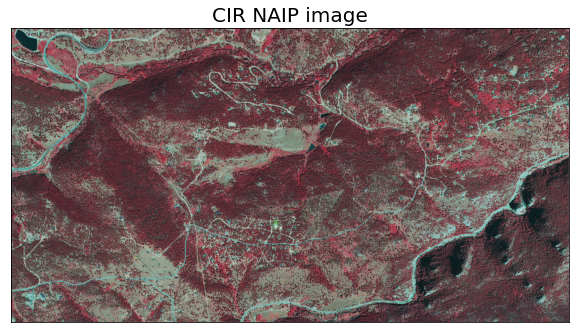

In [11]:
ep.plot_rgb(naip_csf.values, title="CIR NAIP image",
            rgb=[3, 0, 1],
            figsize=(10, 8))
plt.show()

<div class="notice--info" markdown="1">


## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional : How plot_rgb() Works

To render a 3 band, color image in `Python`, you can use the `imshow()` function. 
`imshow` allows you to identify what bands you want to render in the red, green and blue regions. 

To ensure that the image plots and is scaled correctly, you will use the `bytescale()` function which used to be a part of sci-py / sci-image. Scipy deprecated this function so we've added it to the `earthpy` package for you to use in this course

The code will look something like this:

`ax.imshow(es.bytescale(naip_csf.read())[:3].transpose([1, 2, 0]))`

where

* `ax.imshow()` is the call to plot the image
* `et.spatial.bytescale()` ensures that the values in the image are stretched between 0 and 255 which is the range that our monitor can recognize. 

IMPORTANT: when plotting in python, it is important that you TRANSPOSE the data.
The data are read in with the bands FIRST and then the rows and columns. however imshow expects to find the individual bands last. We adjust the dimensions of the data using:

`transpose([])`

Your final code will look like this:

```python
# Plot the first 3 bands of the raster (r,g,b bands)
fig, ax = plt.subplots()
ax.imshow(es.bytescale(naip_csf)[:3].transpose([1, 2, 0]))
plt.show()

```

</div>

<div class="notice--warning" markdown="1">


## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional Challenge: Making Sense of Single Band Images

Plot all of the bands in the NAIP image using python, following the code examples above. Compare grayscale plots of band 1 (red), band 2 (green) and band 4 (near infrared). Is the forested area darker or lighter in band 2 (the green band) compared to band 1 (the red band)?

</div>

<!-- We'd expect a *brighter* value for the forest in band 2 (green) than in band 1 (red) because the leaves on trees of most often appear "green" -
healthy leaves reflect MORE green light compared to red light however the brightest values should be in the NIR band.-->



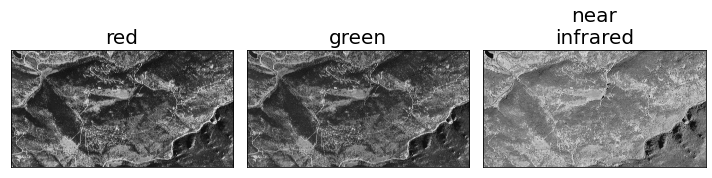

In [12]:
titles = ['red', 'green', 'near\ninfrared']
ep.plot_bands(naip_csf[[0, 1, 3]],
              figsize=(10,  7),
              title=titles,
              cbar=False)
plt.show()

You can customized your plot by removing the ticks and adding a title using `ax.set()`.

* `xticks=[], yticks=[]`: turn off plot "ticks"


In [13]:
# fig, ax = plt.subplots()
# ax.imshow(es.bytescale(naip_csf)[:3].transpose([1, 2, 0]))
# ax.set(title="RGB Composite Image \nCold Springs Fire Scar, Nederland, Colorado",
#        xticks=[], yticks=[])

## Image Stretch To Increase Contrast

The image above looks pretty good. You can explore whether applying a stretch to
the image improves clarity and contrast.

<figure>
    <a href="{{ site.url }}/images/earth-analytics/raster-data/raster-image-stretch-dark.jpg">
    <img src="{{ site.url }}/images/earth-analytics/raster-data/raster-image-stretch-dark.jpg" alt="When the range of pixel brightness values is closer to 0, a
    darker image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.">
    </a>
    <figcaption>When the range of pixel brightness values is closer to 0, a
    darker image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.
    </figcaption>
</figure>

<figure>
    <a href="{{ site.url }}/images/earth-analytics/raster-data/raster-image-stretch-light.jpg">
    <img src="{{ site.url }}/images/earth-analytics/raster-data/raster-image-stretch-light.jpg" alt="When the range of pixel brightness values is closer to 255, a
    lighter image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.">
    </a>
    <figcaption>When the range of pixel brightness values is closer to 255, a
    lighter image is rendered by default. You can stretch the values to extend to
    the full 0-255 range of potential values to increase the visual contrast of
    the image.
    </figcaption>
</figure>

Below you use the skimage package to contrast stretch each band in your data to make the whites more bright and the blacks more dark. 

In the example below you only stretch bands 0,1 and 2 which are the RGB bands. To begin,

1. preallocate an array of zeros that is the same shape as your numpy array.
2. then look through each band in the image and rescale it.

<i class="fa fa-star"></i> **Data Tip:** Read more about image stretch on the <a href="http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html" target = "_blank">scikit-image website</a>.
{: .notice--success }

For convenience we have also built a stretch feature into **earthpy**. You can call it using the stretch argument.

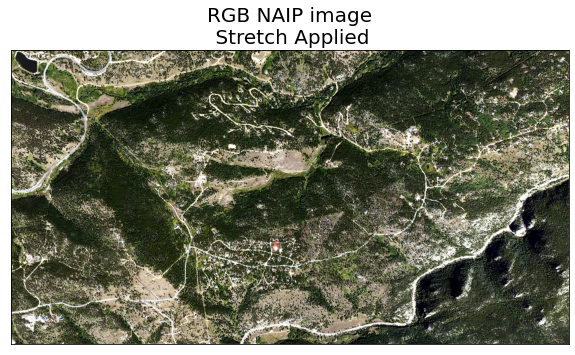

In [15]:
band_indices = [0, 1, 2]

# Apply stretch using the earthpy plot_rgb function
ep.plot_rgb(naip_csf.values,
            rgb=band_indices,
            title="RGB NAIP image\n Stretch Applied",
            figsize=(10, 8),
            stretch=True)
plt.show()

What does the image look like using a different stretch? Any better? worse?

In this case, the stretch does increase the contrast in our image. 
However visually it may or may not be what you want to plot. 


## Multiband Raster Histograms

Just like you did with single band rasters, you can view a histogram of each band in your data using matplotlib. Below, you loop through each band or layer in the number array and plot the distribution of reflectance values. 


In [16]:
# # plot histogram
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.hist(band_2.ravel(),
#         bins=20,
#         color='purple')
# ax.set_title("Histogram of NAIP Band 2 (Green Band)")
# plt.show()

You can use the `ep.hist()` function in earthpy to plot histograms for all bands in your raster. hist() accepts several key arguments including

* `arr`: a numpy array in rasterio band order (bands first)
* `colors`: a list of colors to use for each histogram.
* `title`: plot titles to use for each histogram.
* `cols`: the number of columns for the plot grid.

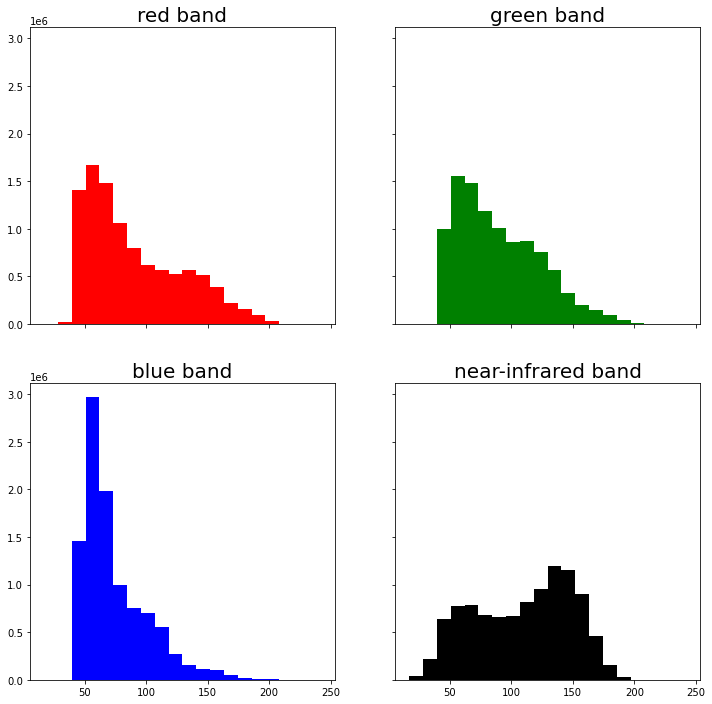

In [17]:
# Create a colors and titles list to use in the histogram, then plot
colors = ['r', 'g', 'b', 'k']
titles = ['red band', 'green band', 'blue band', 'near-infrared band']

ep.hist(naip_csf.values, 
        colors=colors, 
        title=titles, 
        cols=2)

plt.show()

<div class="notice--info" markdown="1">

## Optional - How The Hist Function is Built

If you want to understand how the hist function works, have a look at the code below. Here you can loop through all of the bands and plot the histogram for each one. 

```python
colors = ['r', 'g', 'b', 'k']
titles = ['red band', 'green band', 'blue band', 'nir band']

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

for band, color, the_title, ax in zip(naip_csf, colors, titles, axs.ravel()):
    ax.hist(band.ravel(), bins=20, color=color, alpha=.8)
    ax.set_title(the_title)
```    
</div>


<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional challenge: What Methods Can Be Used on a Python Object?

You can view various methods available to call on an `Python` object by using the tab button in Jupyter notebooks.
Try this in your console: 

type:

`naip_csf_images_rescaled`

then hit the <kbd>tab</kbd> button. What do you see?

Then answer the question: 

*What methods can be used to call on the `naip_csf_images_rescaled` object?*

</div>
